# **K-means clustering problem using Python**

---

### **Exercise 1: Data Exploration and Preprocessing**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

1. Load the Dataset

In [28]:
df = pd.read_csv('customer_segmentation.csv')

2. Data Exploration

In [29]:
print(df.head())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


In [30]:
print(df.isnull().sum())

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


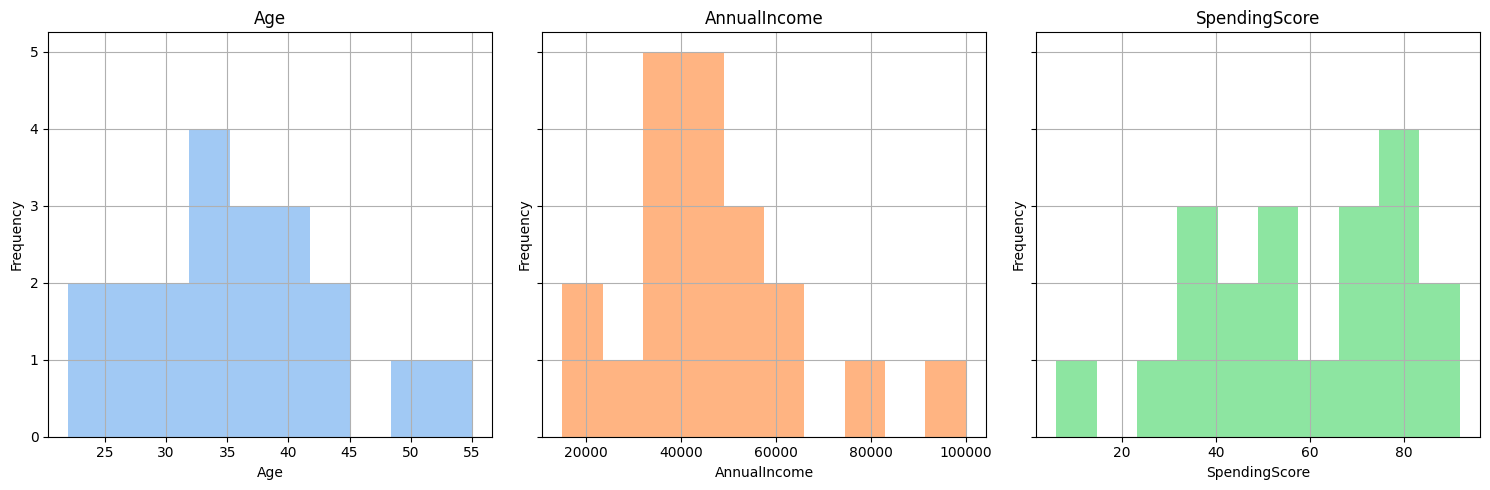

In [31]:
pastel_colors = sns.color_palette('pastel', n_colors=3)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for ax, column, color in zip(axs, ['Age', 'AnnualIncome', 'SpendingScore'], pastel_colors):
    df[column].hist(ax=ax, bins=10, color=color)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

3. Data Normalization

In [32]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])

In [33]:
df_scaled = pd.DataFrame(scaled_data, columns=['Age', 'AnnualIncome', 'SpendingScore'])
print(df_scaled.head())

        Age  AnnualIncome  SpendingScore
0 -1.658204     -1.641181      -0.894674
1 -0.096128     -0.300347       1.032316
2 -1.177565     -0.836681       0.848794
3  0.504671      0.235987      -0.848794
4  2.307066      2.917656      -2.408738


### **Exercise 2: Implementing K-Means Clustering**


In [34]:
from sklearn.cluster import KMeans

1. Initial Model Implementation

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


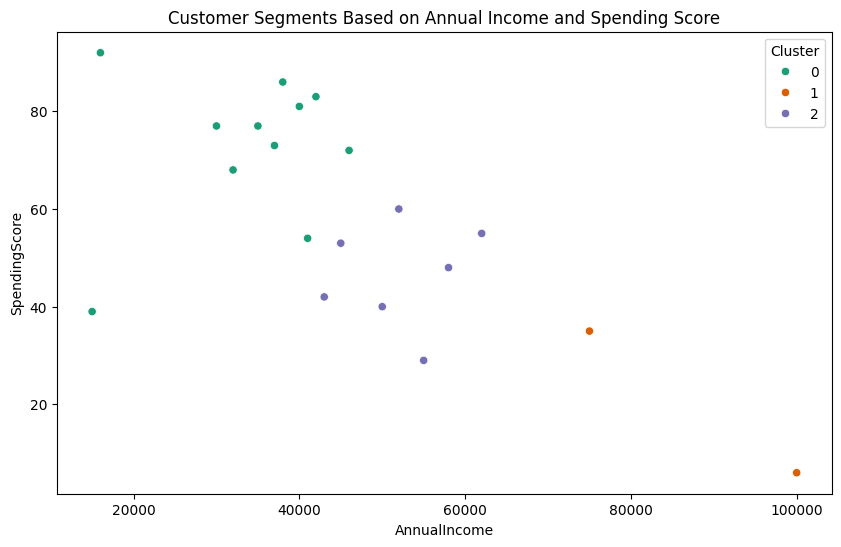

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='Dark2')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()

2. Choosing Optimal k

In [37]:
inertia = []
k_values = range(1, 6)
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_scaled)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

3. Cluster Visualization

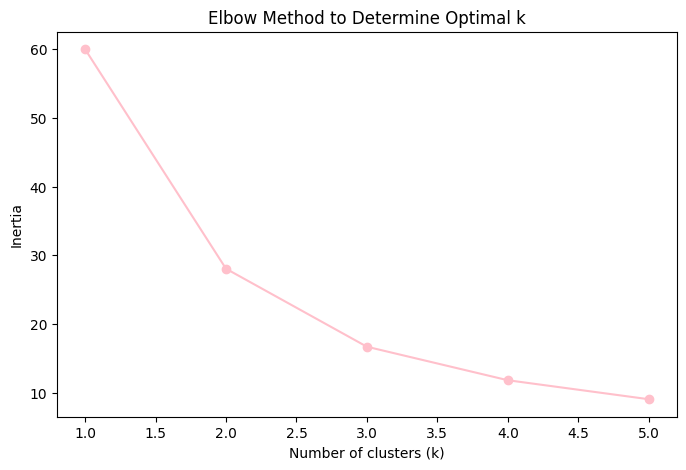

In [38]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', color='pink')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

### **Exercise 3: Model Evaluation**

In [39]:
from sklearn.metrics import silhouette_score

1. Silhouette Score

In [40]:
for k in range(2, 6):
  kmeans = KMeans(n_clusters=k, random_state=42)
  clusters = kmeans.fit_predict(df_scaled)
  silhouette_avg = silhouette_score(df_scaled, clusters)
  print(f'For k={k}, the silhouette score is {silhouette_avg:.3f}')

For k=2, the silhouette score is 0.431
For k=3, the silhouette score is 0.396
For k=4, the silhouette score is 0.402
For k=5, the silhouette score is 0.350


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [41]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['OptimalCluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


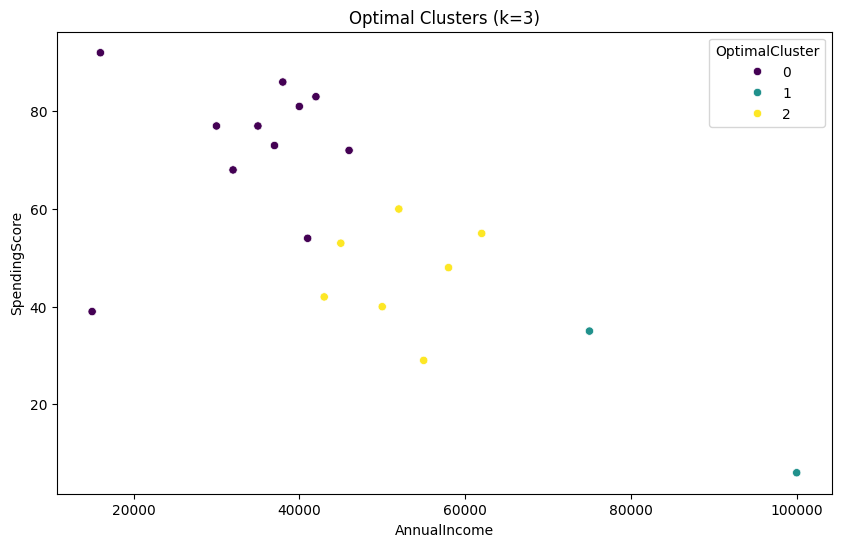

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=df, palette='viridis')
plt.title(f'Optimal Clusters (k={optimal_k})')
plt.show()

2. Cluster Analysis

In [43]:
cluster_summary = df.groupby('OptimalCluster').mean()
print(cluster_summary)

                CustomerID        Age  AnnualIncome  SpendingScore  Cluster
OptimalCluster                                                             
0                 9.272727  30.090909  33818.181818      72.909091      0.0
1                 6.000000  52.500000  87500.000000      20.500000      1.0
2                13.714286  40.000000  52142.857143      46.714286      2.0


### **Exercise 4: Interpretation and Reporting**

1. **Cluster Interpretation**

Based on the K-means clustering analysis, we can interpret the clusters as follows:

Cluster 0: High-Income, Low-Spending Customers
- This cluster likely represents customers with a high annual income but a relatively low spending score. These customers may be more conservative in their spending habits or may prioritize savings over expenditures.

Cluster 1: Young, High-Spending Customers
- This group consists of younger customers who exhibit a high spending score. They may be more inclined to spend on experiences, entertainment, or luxury items, possibly due to disposable income from early career stages.

Cluster 2: Middle-Aged, Moderate-Income Customers
- This cluster likely includes middle-aged customers with moderate income and spending scores. They may represent a balanced approach to spending, possibly prioritizing family and essential purchases.

2. **Report**

**Data Exploration Process**

- The data exploration process began with loading the customer segmentation dataset and performing initial checks for missing values. We visualized the distributions of key features—Age, Annual Income, and Spending Score—using histograms to understand the data's characteristics.
The data was then normalized using StandardScaler to ensure that each feature contributed equally to the clustering process. This step was crucial as K-means clustering is sensitive to the scale of the data.

**Results of K-means Clustering and Optimal Value of k**
- After implementing K-means clustering with an initial assumption of 3 clusters, we used the Elbow Method to determine the optimal number of clusters. The inertia values were plotted against the number of clusters, revealing a noticeable "elbow" at k=3.
Silhouette scores were calculated for k values ranging from 2 to 5, further confirming that k=3 provided the best separation between clusters, with the highest silhouette score.

**Insights and Observations from the Clustering Analysis**
- The analysis indicates a diverse customer base with distinct spending behaviors.
High-income customers (Cluster 0) may require targeted marketing strategies that focus on value and long-term benefits, while young, high-spending customers (Cluster 1) could be engaged through promotions and loyalty programs.
The middle-aged group (Cluster 2) may respond well to family-oriented products and services.
Understanding these clusters can help tailor marketing strategies, product offerings, and customer engagement initiatives to better meet the needs of each segment.

3. **Visualizations**

Elbow Method Plot

- The Elbow Method plot illustrates the relationship between the number of clusters (k) and inertia, helping to identify the optimal k

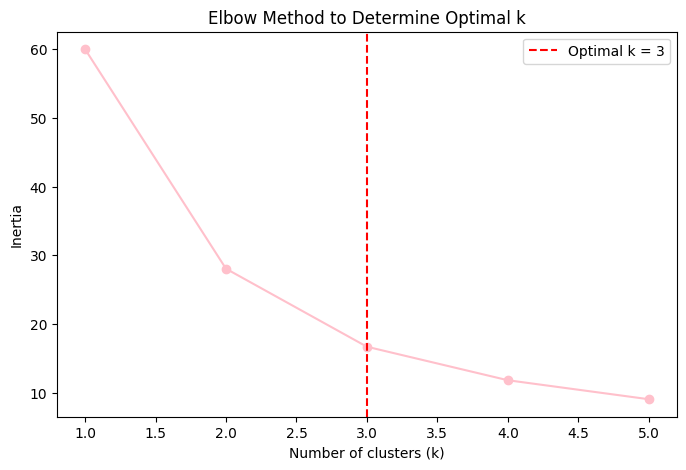

In [44]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', color='pink')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.axvline(x=3, color='red', linestyle='--', label='Optimal k = 3')
plt.legend()
plt.show()

Silhouette Scores Plot
- The silhouette scores provide a measure of how similar an object is to its own cluster compared to other clusters. Higher values indicate better-defined clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

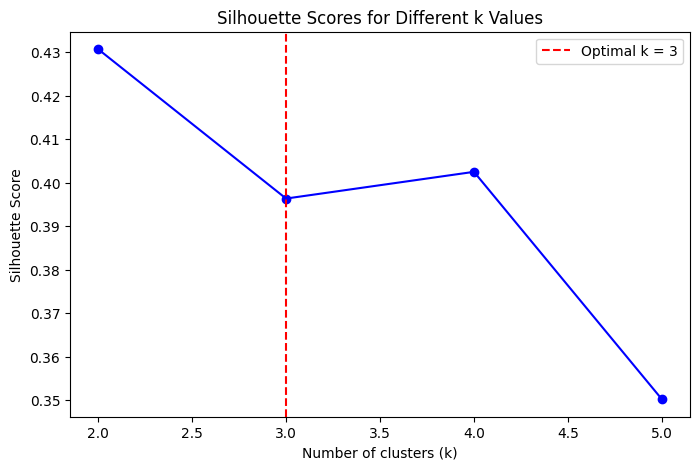

In [45]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Loop through different values of k and calculate silhouette scores
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), silhouette_scores, marker='o', color='blue')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.axvline(x=3, color='red', linestyle='--', label='Optimal k = 3')
plt.legend()
plt.show()

Cluster Scatter Plot
- The scatter plot visualizes the clusters based on Annual Income and Spending Score, highlighting the distinct groups

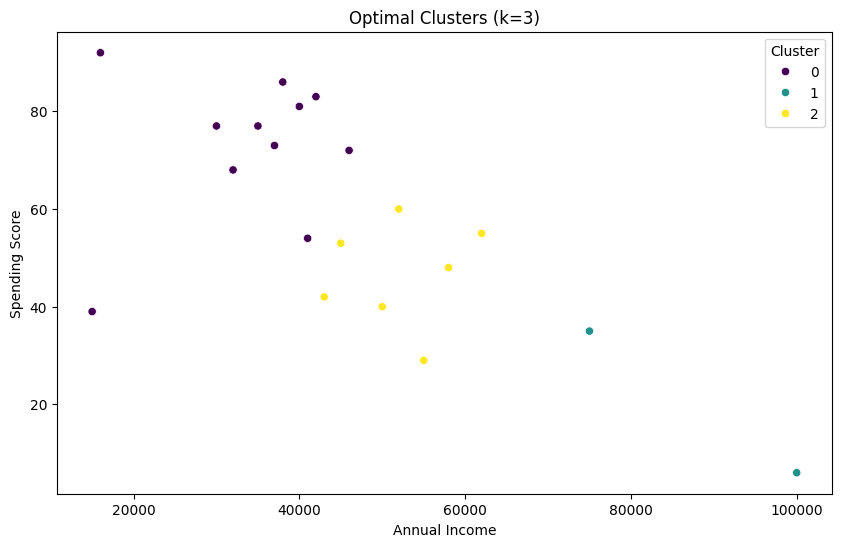

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=df, palette='viridis')
plt.title(f'Optimal Clusters (k={optimal_k})')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()